In [17]:
import numpy as np 
import matplotlib.pyplot as plt 

# <font color=firebrick size=10 > <b> <center> <u> Résultats de l'algorithme </u> </center> </b> </font>

In [51]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

plt.style.use('ggplot')

## <font size=5> <u> Double Deep $Q$-Learning </u> </font>

In [29]:
scores =[0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 3, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 0, 0, 0, 4, 3, 2, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 3, 1, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 3, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 2, 0, 0, 1, 3, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 2, 3, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 2, 1, 2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 0, 0, 4, 1, 0, 0, 2, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 0, 0, 1, 2, 2, 3, 1, 0, 1, 2, 2, 1, 3, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 4, 1, 1, 0, 2, 3, 1, 3, 3, 0, 0, 2, 0, 1, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 3, 1, 1, 0, 0, 1, 0, 0, 0, 3, 0, 1, 2, 1, 2, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 3, 1, 3, 2, 1, 1, 0, 2, 0, 4, 3, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 0, 4, 2, 1, 0, 1, 1, 2, 3, 0, 0, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 0, 2, 3, 1, 0, 2, 2, 3, 1, 0, 1, 2, 0, 1, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 3, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 4, 1, 0, 2, 3, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 1, 0, 3, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 0, 2, 0, 3, 1, 1, 2, 1, 1, 1, 0, 3, 0, 1, 1, 1, 4, 2, 0, 3, 3, 0, 1, 1, 1, 1, 1, 2, 0, 0, 3, 2, 0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 3, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 3, 3, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 2, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 0, 0, 1, 2, 3, 2, 2, 0, 0, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 4, 0, 0, 2, 3, 2, 1, 2, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 0, 2, 1, 0, 1, 1, 2, 3, 1, 1, 3, 1, 1, 3, 0, 1, 2, 0, 1, 0, 0, 0, 4, 1, 0, 0, 3, 1, 2, 0, 0, 1, 4, 1, 0, 4, 2, 1, 1, 0, 0, 2, 2, 2, 3, 0, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 4, 2, 0, 2, 2, 2, 1, 1, 1, 2, 0, 3, 1, 1, 2, 2, 3, 4, 1, 2, 1, 1, 0, 2, 3, 2, 1, 1, 3, 0, 1, 3, 2, 1, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 0, 0, 0, 3, 2, 2, 1, 1, 0, 0, 3, 0, 2, 3, 0, 1, 2, 2, 3, 0, 0, 3, 0, 5, 2, 3, 2, 1, 1, 0, 1, 1, 0, 3, 0, 2, 1, 0, 1, 1, 4, 1, 1, 1, 0, 1, 2, 1, 3, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 2, 3, 0, 0, 0, 1, 2, 3, 1, 0, 3, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 5, 1, 4, 2, 1, 0, 1, 1, 2, 1, 5, 0, 3, 1, 1, 0, 2, 2, 3, 1, 4, 1, 3, 1, 1, 1, 2, 0, 1, 1, 1, 4, 2, 3, 3, 2, 3, 3, 4, 0, 2, 2, 1, 0, 0, 1, 3, 1, 0, 1, 1, 1, 0, 2, 1, 0, 3, 3, 1, 2, 1, 4, 2, 2, 0, 1, 3, 3, 1, 1, 1, 4, 1, 3, 2, 2, 1, 1, 2, 4, 1, 1, 3, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 3, 0, 1, 2, 2, 3, 1, 3, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 0, 2, 3, 3, 1, 4, 2, 2, 3, 1, 1, 1, 3, 0, 3, 2, 1, 0, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 3, 4, 2, 2, 2, 1, 6, 1, 1, 2, 2, 1, 1, 1, 3, 1, 4, 2, 1, 6, 1, 0, 1, 1, 1, 0, 0, 1, 3, 0, 3, 2, 1, 1, 1, 3, 5, 1, 2, 1, 1, 0, 2, 0, 3, 0, 3, 0, 3, 1, 1, 3, 2, 2, 0, 1, 2, 5, 0, 2, 1, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 1, 1, 3, 4, 4, 1, 0, 1, 0, 4, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 1, 2, 3, 0, 2, 1, 1, 2, 2, 1, 3, 2, 4, 2, 3, 3, 3, 2, 1, 0, 2, 3, 2, 0, 0, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 1, 1, 3, 1, 1, 1, 1, 0, 0, 0, 1, 3, 1, 4, 3, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 3, 4, 1, 2, 1, 0, 3, 1, 0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 1, 2, 1, 2, 0, 2, 4, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 3, 3, 2, 1, 1, 1, 1, 4, 1, 3, 0, 2, 2, 1, 3, 2, 3, 1, 0, 2, 0, 1, 2, 1, 2, 1, 4, 0, 1, 2, 3, 2, 0, 1, 0, 2, 1, 0, 1, 2, 1, 3, 2, 3, 2, 1, 1, 2, 2, 2, 4, 3, 0, 1, 3, 2, 2, 3, 1, 2, 1, 5, 0, 1, 2, 1, 1, 2, 4, 1, 4, 2, 1, 1, 2, 2, 2, 2, 3, 1, 1, 3, 1, 5, 2, 2, 3, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 3, 4, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 5, 1, 3, 4, 1, 4, 2, 2, 2, 0, 1, 1, 1, 1, 2, 4, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 4, 2, 3, 1, 3, 1, 5, 1, 1, 6, 2, 2, 2, 1, 3, 1, 2, 1, 3, 2, 2, 1, 3, 1, 3, 1, 1, 4, 0, 2, 2, 1, 4, 2, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 5, 2, 0, 6, 2, 3, 2, 1, 3, 0, 1, 1, 2, 1, 1, 2, 2, 5, 1, 3, 1, 4, 3, 1, 3, 3, 2, 2, 3, 0, 1, 3, 2, 2, 1, 0, 2, 1, 1, 5, 3, 2, 0, 2, 3, 2, 2, 1, 2, 1, 2, 3, 1, 1, 1, 1, 1, 0, 1, 3, 1, 0, 0, 3, 5, 3, 1, 1, 1, 0, 1, 1, 4, 1, 5, 2, 3, 4, 2, 3, 1, 1, 1, 2, 2, 3, 2, 2, 2, 3, 1, 6, 2, 0, 1, 1, 3, 2, 1, 2, 1, 3, 0, 3, 1, 3, 2, 2, 1, 2, 2, 3, 3, 1, 1, 1, 1, 0, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 4, 2, 1, 1, 3, 4, 3, 3, 2, 1, 1, 1, 1, 2, 2, 5, 2, 2, 0, 3, 2, 3, 2, 2, 2, 3, 1, 3, 1, 1, 0, 2, 1, 2, 2, 3, 2, 0, 1, 1, 0, 2, 0, 2, 2, 3, 5, 5, 4, 0, 2, 0, 1, 1, 1, 1, 4, 2, 2, 4, 2, 3, 0, 2, 2, 2, 2, 0, 1, 1, 6, 0, 0, 2, 2, 0, 1, 2, 0, 0, 1, 3, 2, 2, 1, 1, 0, 2, 1, 2, 1, 3, 1, 2, 2, 1, 2, 0, 2, 4, 2, 2, 2, 2, 3, 4, 1, 3, 3, 3, 3, 4, 2, 1, 1, 2, 2, 0, 1, 0, 1, 1, 3, 2, 2, 2, 3, 1, 2, 1, 1, 2, 0, 1, 2, 1, 4, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 4, 0, 1, 3, 3, 1, 2, 2, 1, 5, 2, 2, 2, 0, 0, 0, 1, 1, 3, 1, 4, 3, 5, 2, 1, 1, 1, 3, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 3, 1, 2, 1, 4, 2, 2, 2, 1, 2, 3, 3, 0, 3, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 4, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 5, 2, 4, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 5, 3, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 4, 5, 2, 1, 1, 0, 4, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 2, 5, 0, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 4, 2, 5, 2, 1, 1, 1, 2, 1, 4, 1, 1, 2, 2, 1, 1, 4, 1, 3, 1, 1, 1, 3, 2, 2, 4, 2, 2, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 3, 5, 4, 4, 5, 5, 1, 4, 2, 2, 2, 0, 1, 1, 2, 4, 4, 1, 2, 5, 3, 1, 2, 3, 1, 2, 4, 2, 5, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 0, 4, 1, 3, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 4, 2, 2, 2, 1, 1, 4, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 4, 1, 2, 1, 1, 1, 1, 4, 1, 1, 2, 2, 4, 2, 4, 1, 1, 4, 2, 1, 2, 4, 4, 2, 4, 2, 3, 2, 2, 2, 2, 1, 1, 1, 6, 1, 3, 1, 1, 4, 2, 4, 1, 1, 1, 1, 3, 1, 0, 1, 4, 4, 1, 2, 3, 5, 5, 3, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 2, 2, 5, 2, 5, 2, 1, 3, 2, 2, 1, 5, 3, 1, 4, 1, 3, 2, 5, 2, 0, 4, 2, 2, 2, 2, 4, 2, 3, 3, 1, 1, 3, 3, 1, 2, 2, 3, 3, 1, 3, 4, 4, 6, 6, 2, 1, 1, 2, 3, 4, 2, 4, 3, 3, 1, 1, 3, 1, 1, 4, 1, 0, 4, 2, 1, 1, 3, 1, 3, 1, 3, 1, 2, 2, 4, 2, 1, 1, 1, 1, 0, 5, 6, 1, 1, 2, 1, 3, 1, 3, 1, 3, 3, 3, 5, 6, 1, 1, 1, 5, 3, 3, 1, 3, 1, 1, 3, 2, 1, 4, 1, 2, 3, 4, 1, 3, 3, 1, 1, 1, 1, 1, 4, 3, 1, 3, 4, 3, 1, 2, 4, 4, 2, 1, 1, 1, 4, 2, 4, 1, 1, 4, 4, 3, 0, 2, 4, 5, 2, 2, 2, 6, 4, 2, 4, 5, 1, 3, 5, 5, 1, 3, 3, 3, 4, 3, 4, 3, 2, 3, 1, 5, 4, 3, 3, 1, 6, 3, 5, 4, 5, 2, 3, 6, 3, 1, 1, 2, 4, 6, 1, 4, 2, 2, 0, 0, 2, 2, 4, 1, 2, 6, 2, 2, 4, 2, 4, 1, 1, 4, 2, 4, 2, 1, 4, 3, 1, 1, 5, 5, 2, 4, 3, 2, 3, 3, 3, 2, 4, 4, 4, 3, 2, 2, 2, 4, 6, 2, 2, 2, 4, 4, 4, 4, 2, 3, 3, 5, 2, 2, 3, 4, 2, 3, 3, 6, 3, 7, 1, 3, 5, 3, 5, 3, 4, 5, 5, 4, 6, 4, 6, 1, 3, 3, 7, 2, 4, 3, 2, 4, 3, 4, 4, 3, 3, 4, 0, 1, 3, 3, 5, 4, 3, 3, 4, 4, 4, 6, 3, 2, 5, 1, 4, 3, 2, 5, 4, 4, 1, 4, 6, 1, 2, 4, 2, 6, 3, 1, 7, 1, 4, 6, 3, 4, 3, 4, 3, 1, 4, 3, 1, 2, 2, 1, 7, 1, 6, 5, 4, 2, 4, 3, 2, 4, 4, 6, 1, 5, 4, 6, 5, 3, 6, 7, 6, 1, 4, 1, 2, 4, 3, 4, 5, 3, 2, 3, 3, 3, 4, 5, 3, 3, 2, 4, 6, 3, 6, 5, 1, 0, 3, 4, 3, 3, 4, 2, 4, 4, 4, 1, 2, 2, 5, 3, 4, 3, 4, 5, 6, 3, 5, 3, 3, 3, 4, 3, 6, 5, 4, 6, 1, 8, 2, 6, 2, 4, 2, 6, 4, 5, 4, 2, 2, 7, 4, 2, 6, 4, 0, 3, 3, 4, 3, 2, 5, 3, 2, 3, 3, 3, 1, 4, 3, 2, 7, 3, 5, 2, 1, 2, 1, 4, 4, 2, 4, 4, 5, 3, 1, 2, 2, 1, 3, 6, 3, 4, 3, 3, 1, 3, 2, 4, 5, 4, 4, 3, 6, 4, 4, 2, 2, 4, 5, 4, 8, 7, 2, 8, 2, 4, 4, 6, 3, 4, 2, 4, 3, 4, 6, 2, 4, 3, 6, 4, 1, 4, 7, 3, 5, 5, 6, 3, 4, 4, 5, 4, 2, 3, 5, 4, 2, 4, 1, 5, 4, 2, 7, 2, 2, 6, 2, 4, 3, 2, 1, 2, 4, 3, 3, 3, 4, 0, 2, 8, 2, 2, 3, 4, 3, 4, 5, 7, 4, 5, 3, 3, 2, 8, 3, 6, 8, 6, 5, 5, 4, 3, 6, 4, 3, 6, 3, 4, 1, 3, 2, 3, 2, 1, 4, 6, 4, 4, 3, 4, 5, 5, 4, 2, 2, 4, 4, 7, 4, 3, 4, 5, 5, 6, 4, 4, 3, 4, 4, 2, 4, 4, 3, 0, 5, 2, 5, 4, 4, 4, 6, 4, 5, 3, 4, 4, 4, 6, 0, 4, 2, 4, 6, 0, 1, 6, 3, 4, 4, 2, 5, 5, 4, 5, 4, 5, 3, 2, 6, 3, 4, 1, 5, 3, 4, 0, 5, 3, 5, 3, 5, 4, 3, 8, 2, 5, 4, 6, 5, 2, 1, 5, 4, 4, 6, 2, 4, 2, 6, 4, 4, 2, 5, 0, 4, 5, 6, 3, 4, 3, 6, 6, 1, 2, 1, 7, 6, 3, 6, 3, 4, 6, 0, 4, 0, 4, 5, 6, 4, 2, 3, 6, 5, 3, 5, 6, 5, 6, 4, 2, 1, 0, 3, 2, 2, 5, 2, 2, 4, 6, 3, 1, 4, 4, 4, 1, 5, 5, 4, 6, 1, 3, 5, 2, 4, 3, 5, 6, 6, 4, 6, 5, 4, 5, 5, 5, 5, 1, 2, 3, 5, 3, 6, 4, 4, 3, 1, 2, 6, 4, 3, 6, 6, 2, 1, 6, 4, 5, 6, 4, 5, 3, 4, 1, 3, 5, 4, 5, 3, 7, 2, 2, 2, 2, 5, 5, 3, 2, 5, 2, 2, 1, 1, 4, 3, 4, 4, 4, 2, 4, 5, 3, 4, 3, 3, 4, 5, 0, 6, 4, 4, 3, 4, 5, 3, 4, 4, 7, 6, 3, 4, 1, 5, 2, 1, 4, 3, 5, 6, 1, 4, 3, 6, 6, 2, 8, 4, 2, 6, 3, 4, 4, 4, 3, 6, 6, 4, 6, 6, 2, 3, 6, 4, 4, 7, 2, 6, 0, 4, 5, 1, 6, 4, 6, 3, 3, 3, 0, 2, 6, 4, 6, 6, 3, 4, 6, 2, 4, 5, 2, 3, 3, 4, 5, 3, 4, 4, 6, 2, 4, 5, 8, 5, 3, 4, 7, 4, 4, 4, 5, 6, 5, 2, 2, 5, 5, 6, 6, 4, 2, 6, 4, 4, 7, 4, 3, 7, 4, 6, 7, 5, 3, 6, 2, 1, 6, 7, 6, 3, 6, 6, 8, 8, 3, 6, 5, 5, 4, 5, 3, 4, 8, 6, 7, 0, 6, 6, 4, 1, 2, 6, 7, 3, 4, 5, 7, 6, 4, 5, 3, 5, 6, 2, 5, 4, 6, 6, 6, 1, 6, 6, 5, 5, 6, 4, 9, 4, 6, 6, 3, 6, 4, 6, 6, 6, 4, 4, 4, 6, 6, 9, 6, 6, 6, 8, 6, 7, 6, 4, 3, 5, 6, 8, 6, 6, 3, 6, 7, 3, 6, 4, 6, 1, 6, 2, 6, 6, 6, 4, 2, 6, 6, 2, 5, 6, 6, 4, 5, 6, 6, 2, 2, 9, 3, 2, 6, 2, 7, 6, 6, 6, 6, 2, 6, 3, 4, 4, 5, 8, 6, 6, 6, 8, 4, 6, 6, 2, 2, 6, 6, 2, 2, 6, 6, 6, 5, 4, 9, 6, 2, 4, 1, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 6, 2, 3, 6, 6, 6, 6, 6, 6, 6, 3, 4, 6, 3, 6, 7, 6, 3, 4, 6, 6, 6, 6, 6, 2, 6, 7, 6, 3, 6, 6, 5, 6, 6, 6, 6, 6, 3, 3, 6, 2, 6, 2, 2, 4, 7, 6, 6, 6, 6, 6, 6, 6, 4, 6, 5, 6, 6, 6, 2, 5, 4, 1, 9, 5, 6, 2, 9, 6, 8, 1, 6, 6, 6, 6, 6, 6, 6, 6, 9, 2, 4, 3, 5, 2, 6, 2, 3, 4, 5, 6, 6, 9, 2, 6, 6, 6, 6, 5, 2, 7, 2, 3, 6, 4, 6, 6, 8, 6, 4, 5, 6, 5, 6, 4, 6, 5, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 5, 6, 6, 2, 6, 6, 4, 6, 4, 4, 6, 6, 6, 6, 3, 4, 6, 7, 6, 6, 6, 5, 6, 4, 5, 6, 6, 6, 6, 5, 6, 6, 4, 2, 6, 4, 5, 3, 4, 4, 6, 6, 6, 5, 6, 4, 6, 6, 4, 4, 4, 5, 6, 6, 6, 6, 3, 6, 6, 6, 4, 6, 6, 6, 4, 0, 4, 6, 5, 2, 6, 6, 3, 6, 6, 2, 4, 6, 6, 8, 4, 1, 6, 6, 4, 6, 6, 6, 6, 6, 6, 2, 6, 5, 6, 2, 6, 6, 8, 6, 5, 6, 6, 6, 6, 6, 6, 2, 4, 4, 3, 6, 6, 6, 4, 3, 3, 6, 6, 0, 7, 6, 2, 6, 3, 6, 6, 4, 6, 3, 6, 6, 6, 5, 6, 4, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 4, 3, 2, 6, 6, 2, 5, 6, 6, 6, 6, 6, 6, 4, 6, 3, 6, 4, 6, 6, 5, 6, 6, 4, 6, 6, 6, 2, 6, 6, 2, 4, 6, 6, 2, 6, 6, 6, 5, 4, 6, 6, 4, 6, 6, 5, 6, 5, 6, 6, 3, 8, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 4, 6, 6, 5, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 2, 6, 2, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 4, 6, 8, 4, 6, 6, 6, 5, 3, 6, 5, 6, 6, 6, 6, 4, 5, 4, 5, 4, 4, 2, 6, 6, 4, 6, 6, 2, 2, 6, 3, 6, 6, 6, 4, 6, 6, 5, 6, 4, 6, 5, 0, 4, 6, 4, 4, 6, 6, 4, 4, 4, 6, 6, 4, 6, 4, 4, 2, 7, 6, 6, 3, 6, 6, 6, 6, 6, 2, 6, 6, 3, 6, 2, 6, 6, 5, 6, 6, 6, 2, 0, 6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 8, 4, 5, 6, 6, 6, 6, 2, 4, 1, 6, 6, 6, 6, 6, 3, 4, 6, 6, 5, 4, 6, 6, 2, 8, 5, 6, 8, 6, 0, 6, 6, 4, 6, 6, 6, 3, 6, 6, 4, 6, 6, 6, 5, 6, 5, 6, 6, 2, 3, 8, 4, 6, 5, 2, 6, 6, 4, 6, 4, 6, 6, 2, 2, 3, 6, 8, 4, 4, 6, 6, 6, 6, 3, 5, 6, 5, 2, 6, 6, 6, 2, 7, 6, 6, 6, 3, 4, 4, 6, 6, 6, 4, 6, 3, 6, 6, 6, 6, 2, 4, 6, 6, 5, 6, 6, 4, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 5, 6, 6, 4, 8, 5, 6, 7, 5, 7, 5, 6, 6, 2, 8, 6, 5, 2, 6, 6, 7, 4, 6, 8, 3, 6, 6, 7, 6, 4, 6, 6, 6, 3, 6, 7, 5, 4, 6, 6, 6, 6, 6, 3, 6, 6, 6, 7, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 4, 5, 6, 6, 7, 2, 6, 1, 6, 6, 6, 6, 2, 4, 7, 2, 3, 6, 6, 6, 8, 4, 6, 3, 6, 6, 6, 6, 6, 2, 6, 4, 6, 8, 6, 5, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 3, 8, 5, 6, 4, 2, 2, 6, 4, 6, 4, 1, 6, 6, 6, 6, 6, 8, 6, 6, 6, 6, 6, 6, 2, 5, 6, 1, 6, 6, 4, 4, 4, 6, 6, 4, 6, 6, 6, 5, 4, 6, 6, 5, 0, 0, 6, 6, 4, 6, 6, 6, 6, 5, 6, 6, 4, 4, 6, 6, 5, 6, 6, 6, 6, 6, 4, 6, 7, 3, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 8, 2, 6, 6, 6, 6, 4, 6, 6, 5, 6, 4, 6, 6, 6, 7, 6, 6, 6, 5, 6, 6, 6, 6, 3, 6, 6, 4, 6, 0, 6, 6, 6, 5, 4, 6, 6, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 0, 6, 4, 6, 4, 4, 4, 6, 6, 6, 4, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 4, 6, 6, 6, 2, 6, 6, 5, 6, 6, 6, 6, 6, 4, 0, 6, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 6, 4, 5, 6, 6, 6, 2, 6, 8, 6, 6, 5, 5, 6, 5, 6, 6, 4, 6, 6, 6, 3, 6, 6, 6, 4, 6, 6, 3, 4, 2, 4, 6, 6, 6, 3, 6, 6, 6, 6, 3, 7, 6, 6, 4, 6, 3, 2, 6, 6, 5, 3, 4, 6, 2, 3, 6, 6, 6, 2, 5, 2, 3, 6, 8, 5, 6, 4, 5, 6, 6, 6, 6, 5, 4, 6, 6, 6, 6, 4, 8, 6, 6, 6, 6, 6, 4, 6, 4, 4, 6, 6, 5, 5, 6, 4, 2, 6, 4, 6, 6, 5, 3, 6, 4, 6, 5, 6, 4, 2, 4, 5, 4, 4, 4, 4, 0, 6, 6, 6, 6, 6, 5, 6, 6, 8, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 4, 6, 4, 2, 6, 4, 4, 6, 2, 4, 4, 4, 6, 6, 3, 6, 6, 2, 6, 6, 6, 6, 6, 6, 2, 8, 6, 6, 6, 6, 2, 4, 6, 6, 5, 6, 6, 6, 6, 4, 6, 4, 6, 6, 6, 6, 6, 3, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 4, 2, 3, 6, 6, 6, 2, 3, 6, 6, 3, 8, 4, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 4, 6, 5, 4, 4, 3, 5, 6, 6, 6, 6, 6, 6, 4, 4, 2, 6, 3, 0, 4, 6, 4, 6, 5, 6, 6, 4, 5, 6, 6, 7, 4, 3, 6, 6, 5, 6, 6, 6, 6, 6, 4, 4, 6, 2, 6, 4, 6, 6, 6, 6, 6, 2, 4, 6, 6, 6, 6, 0, 6, 6, 2, 6, 6, 6, 2, 4, 6, 6, 6, 5, 6, 6, 5, 6, 4, 6, 6, 6, 9, 6, 6, 5, 4, 6, 6, 6, 6, 4, 5, 6, 4, 4, 5, 6, 0, 6, 5, 3, 6, 3, 6, 4, 5, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 3, 6, 6, 2, 6, 6, 2, 6, 9, 0, 6, 6, 6, 6, 8, 6, 6, 6, 6, 8, 6, 5, 6, 4, 6, 2, 0, 4, 4, 6, 6, 1, 6, 5, 6, 6, 5, 4, 6, 6, 6, 6, 6, 6, 3, 6, 6, 2, 6, 4, 6, 0, 6, 3, 6, 6, 6, 6, 3, 6, 5, 3, 2, 6, 6, 4, 4, 4, 5, 6, 6, 6, 6, 4, 4, 7, 2, 6, 6, 4, 6, 6, 5, 6, 6, 0, 5, 5, 6, 5, 6, 6, 6, 6, 6, 3, 6, 5, 6, 6, 2, 4, 4, 6, 6, 2, 4, 4, 6, 6, 6, 4, 3, 6, 4, 5, 3, 4, 6, 6, 6, 6, 2, 6, 6, 6, 2, 4, 4, 6, 6, 6, 6, 5, 6, 5, 6, 4, 6, 2, 2, 6, 0, 6, 5, 3, 6, 6, 5, 6, 6, 6, 6, 6, 4, 4, 6, 4, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 2, 6, 4, 2, 5, 6, 6, 2, 8, 6, 6, 4, 2, 6, 4, 4, 6, 2, 6, 1, 6, 3, 8, 2, 8, 6, 6, 6, 4, 6, 4, 7, 6, 6, 6, 6, 6, 2, 6, 6, 3, 6, 6, 6, 4, 6, 5, 3, 4, 2, 6, 6, 6, 3, 4, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 6, 5, 6, 5, 9, 8, 6, 6, 4, 6, 6, 4, 6, 6, 6, 6, 4, 5, 6, 6, 6, 6, 6, 4, 6, 4, 6, 6, 4, 6, 4, 6, 7, 5, 6, 5, 6, 6, 3, 4, 2, 5, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 7, 6, 6, 6, 5, 4, 6, 6, 6, 6, 8, 2, 6, 6, 6, 9, 6, 5, 6, 4, 6, 6, 4, 4, 8, 6, 4, 3, 6, 2, 6, 6, 6, 6, 5, 6, 4, 4, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 2, 6, 6, 6, 6, 9, 4, 6, 4, 2, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 4, 6, 1, 6, 6, 6, 2, 6, 6, 2, 5, 6, 6, 6, 4, 4, 3, 4, 6, 9, 6, 9, 6, 5, 2, 6, 6, 6, 6, 6, 6, 4, 4, 6, 6, 6, 6, 6, 4, 4, 2, 6, 6, 5, 6, 5, 6, 6, 8, 6, 2, 4, 6, 3, 4, 6, 6, 6, 4, 6, 6, 4, 6, 4, 5, 6, 6, 9, 6, 6, 4, 6, 6, 6, 4, 6, 6, 6, 6, 8, 6, 4, 6, 2, 6, 5, 6, 6, 6, 3, 4, 6, 6, 6, 4, 6, 2, 6, 6, 8, 6, 6, 5, 4, 2, 6, 6, 6, 6, 5, 2, 6, 6, 2, 0, 6, 0, 4, 6, 6, 6, 6, 6, 4, 6, 6, 2, 6, 6, 4, 6, 4, 6, 6, 6, 7, 6, 6, 6, 4, 8, 4, 5, 6, 2, 6, 6, 6, 6, 6, 6, 5, 5, 6, 4, 6, 6, 6, 6, 7, 6, 6, 4, 0, 6, 4, 5, 6, 5, 6, 6, 3, 4, 6, 6, 4, 5, 6, 6, 6, 6, 0, 6, 6, 4, 6, 6, 6, 6, 6, 6, 4, 6, 6, 2, 4, 4, 4, 5, 6, 8, 5, 4, 4, 6, 6, 5, 4, 6, 6, 6, 6, 4, 4, 2, 2, 6, 0, 6, 4, 3, 6, 6, 6, 5, 6, 9, 6, 6, 8, 6, 2, 6, 6, 6, 6, 7, 4, 5, 4, 6, 6, 6, 4, 6, 3, 4, 6, 6, 6, 5, 4, 6, 6, 6, 8, 6, 2, 2, 6, 4, 6, 6, 6, 4, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 2, 6, 6, 4, 6, 6, 6, 6, 2, 6, 5, 9, 4, 6, 6, 5, 5, 2, 6, 5, 5, 2, 5, 1, 6, 6, 6, 5, 6, 6, 2, 4, 5, 5, 4, 6, 8, 6, 6, 6, 4, 6, 5, 6, 6, 4, 6, 4, 6, 6, 6, 4, 5, 8, 6, 6, 6, 6, 4, 0, 4, 5, 6, 6, 5, 6, 6, 7, 2, 6, 6, 6, 6, 4, 6, 8, 6, 6, 6, 6, 4, 5, 5, 4, 8, 3, 8, 5, 4, 6, 5, 6, 6, 6, 4, 4, 4, 6, 5, 6, 4, 5, 5, 6, 6, 4, 6, 6, 6, 5, 6, 6, 4, 3, 2, 1, 6, 6, 4, 6, 4, 2, 5, 2, 8, 6, 6, 6, 6, 4, 6, 6, 6, 6, 9, 6, 2, 5, 8, 6, 5, 6, 6, 3, 6, 3, 6, 2, 5, 6, 6, 8, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 8, 4, 5, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 5, 2, 5, 6, 8, 6, 6, 6, 5, 5, 6, 6, 6, 6, 1, 6, 6, 6, 4, 6, 6, 4, 4, 2, 2, 6, 6, 4, 6, 1, 2, 3, 6, 6, 6, 6, 2, 8, 2, 6, 6, 5, 6, 6, 2, 6, 6, 6, 6, 4, 6, 6, 0, 6, 6, 6, 6, 6, 6, 6, 4, 6, 0, 6, 6, 6, 4, 8, 6, 6, 7, 9, 2, 6, 3, 6, 6, 6, 4, 5, 6, 6, 0, 4, 6, 5, 5, 6, 6, 6, 2, 6, 5, 6, 8, 6, 6, 6, 6, 6, 6, 4, 6, 2, 6, 6, 6, 6, 6, 2, 4, 6, 8, 8, 6, 6, 6, 6, 6, 6, 4, 4, 6, 6, 4, 4, 6, 8, 6, 4, 6, 6, 8, 4, 6, 2, 6, 6, 5, 6, 4, 6, 5, 6, 9, 6, 6, 6, 6, 3, 6, 6, 6, 6, 6, 4, 6, 4, 6, 0, 6, 6, 2, 2, 6, 6, 5, 6, 6, 6, 4, 6, 6, 6, 6, 4, 6, 6, 5, 6, 6, 2, 6, 6, 0, 6, 6, 6, 9, 6, 4, 6, 6, 6, 5, 6, 6, 6, 4, 5, 6, 6, 6, 6, 6, 3, 6, 6, 4, 5, 6, 4, 4, 8, 6, 4, 6, 2, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 6, 6, 2, 6, 5, 5, 4, 6, 4, 6, 4, 6, 6, 6, 4, 6, 5, 6, 6, 2, 6, 6, 5, 6, 6, 6, 2, 6, 6, 6, 6, 6, 6, 6, 6, 2, 6, 3, 6, 6, 6, 6, 1, 5, 4, 4, 6, 4, 6, 6, 6, 4, 4, 3, 6, 3, 5, 6, 2, 8, 6, 3, 6, 2, 4, 4, 5, 6, 6, 5, 3, 6, 6, 6, 6, 3, 4, 6, 4, 6, 6, 6, 6, 3, 4, 5, 9, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 2, 5, 4, 6, 6, 3, 6, 6, 5, 6, 2, 6, 6, 8, 4, 6, 6, 6, 4, 5, 6, 6, 6, 6, 4, 4, 6, 3, 7, 5, 6, 6, 2, 4, 6, 2, 4, 2, 4, 4, 6, 6, 5, 4, 6, 6, 3, 0, 6, 5, 8, 5, 6, 6, 6, 8, 5, 6, 6, 6, 6, 6, 5, 6, 6, 4, 8, 4, 6, 4, 6, 4, 6, 6, 6, 4, 6, 6, 8, 5, 7, 2, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 4, 5, 6, 6, 6, 5, 8, 6, 6, 5, 6, 2, 6, 6, 6, 6, 4, 4, 6, 6, 6, 4, 6, 5, 6, 4, 6, 6, 6, 2, 6, 4, 6, 6, 6, 5, 6, 8, 6, 4, 6, 5, 5, 6, 4, 6, 6, 3, 6, 5, 6, 6, 6, 6, 4, 4, 6, 6, 6, 6, 6, 5, 4, 6, 8, 6, 6, 5, 6, 6, 6, 6, 6, 4, 4, 6, 6, 2, 6, 6, 4, 6, 6, 9, 6, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 0, 6, 2, 6, 6, 4, 6, 6, 6, 6, 6, 6, 4, 3, 4, 6, 6, 5, 6, 6, 4, 6, 6, 6, 3, 5, 6, 5, 6, 5, 6, 4, 6, 6, 8, 6, 3, 8, 6, 6, 6, 6, 5, 6, 6, 4, 6, 6, 4, 4, 4, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 4, 6, 2, 6, 6, 6, 3, 5, 6, 9, 6, 6, 5, 0, 4, 4, 6, 6, 6, 6, 6, 6, 6, 3, 6, 6, 6, 4, 4, 5, 6, 6, 6, 6, 6, 6, 6, 5, 2, 6, 6, 4, 9, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 4, 6, 6, 2, 6, 2, 0, 6, 8, 4, 6, 6, 6, 2, 6, 6, 9, 6, 6, 6, 0, 6, 6, 5, 6, 4, 5, 5, 6, 6, 6, 6, 2, 5, 6, 6, 6, 5, 6, 7, 6, 6, 6, 7, 6, 6, 3, 6, 9, 6, 6, 6, 6, 6, 3, 4, 5, 6, 5, 6, 6, 6, 4, 6, 2, 6, 9, 5, 6, 6, 4, 6, 2, 9, 6, 6, 8, 5, 5, 6, 6, 6, 5, 6, 4, 6, 6, 6, 6, 4, 6, 6, 4, 6, 2, 6, 2, 6, 8, 6, 6, 6, 5, 4, 5, 6, 4, 6, 4, 5, 6, 6, 4, 6, 6, 6, 9, 6, 6, 6, 6, 6, 5, 6, 6, 4, 3, 6, 5, 6, 4, 6, 3, 6, 6, 6, 6, 6, 6, 4, 4, 6, 6, 6, 6, 6, 5, 6, 2, 6, 6, 4, 0, 5, 6, 6, 6, 4, 6, 4, 6, 6, 6, 3, 6, 6, 6, 2, 6, 6, 6, 9, 5, 6, 5]

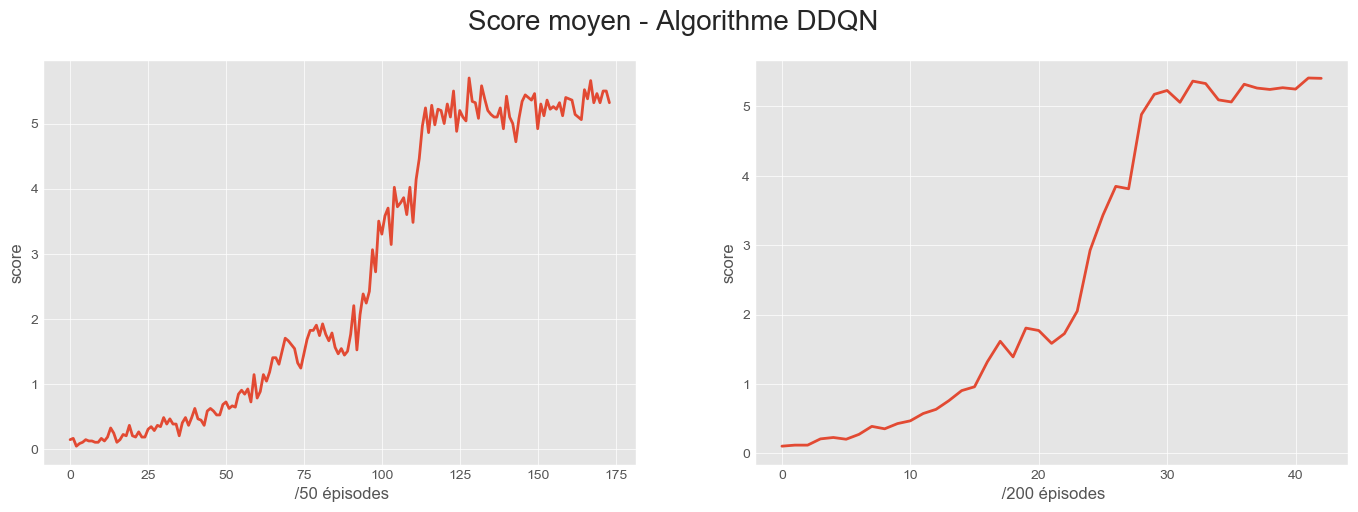

In [50]:
# Moyenne sur K épisodes : 
n=len(scores)

listK=[50,200]
plt.figure(figsize=(15.,5.))
plt.suptitle('Score moyen - Algorithme DDQN',fontsize=20)
for i,k in enumerate(listK):
    plt.subplot(1,2,i+1)
    
    N=n//k
    moy=list()
    for p in range(N):
        moy.append(np.mean(scores[p*k:(p+1)*k]))

    plt.plot(moy)
    plt.xlabel(' /'+str(k)+' épisodes')
    plt.ylabel('score')

In [49]:
max_scores = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
total_scores = np.cumsum(scores)

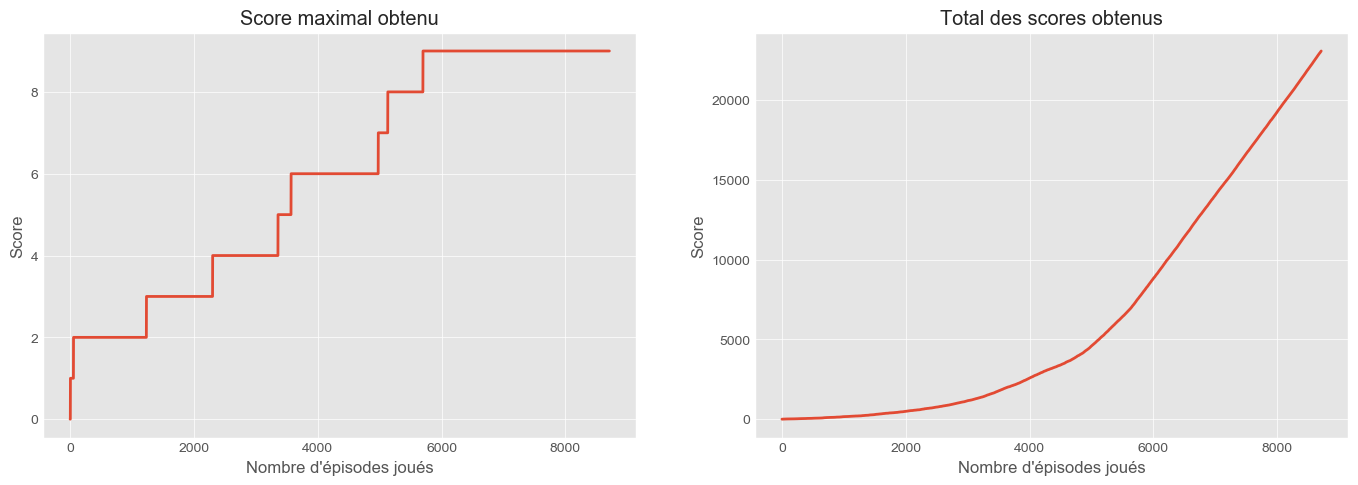

In [53]:
# Max scores et total scores 
plt.figure(figsize=(15.,5.))

plt.subplot(1,2,1)
plt.plot(max_scores)
plt.title('Score maximal obtenu')
plt.ylabel('Score')
plt.xlabel('Nombre d\'épisodes joués')


plt.subplot(1,2,2)
plt.plot(total_scores)
plt.title('Total des scores obtenus')
plt.ylabel('Score')
plt.xlabel('Nombre d\'épisodes joués')

plt.show()